In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# current working directory
PATH = r"C:\Users\doosti\Dropbox (Chapman)\Research\Research Projects\Fitness\Data"

In [22]:
# Loading data files
performance = pd.read_csv(os.path.join(PATH, 'performance.csv'))
creator_id_convert = pd.read_csv(os.path.join(PATH, 'creator_id_convert.csv'))
trend = pd.read_csv(os.path.join(PATH, 'channel_trends_to_stata.csv'))

In [23]:
creator_id_convert.head()

,creator_id,youtube_id
0,nGdL7FhhGC,yta_FKE7WVJfvaHW5q283SxchA
1,292js2E5nD03YGFoX01,yta__EdJML22is1p0n5JXeh5QQ
2,2zNDCwKoz03Z65e601,yta_eP4oj6TsUlnlzQqUzKxUjg
3,3r2vvJJmur03WAUnq01,yta_oR05_B9n4d8jY0vB_wCIhQ
4,AN2sJuJhwS03Y4JM201,yta_CuVOIe5OFq5OznI6XWwKTA


In [24]:
# replacing gid (youtube) creator_id (gid) with tubular creator_id
performance['creator_id'] = performance.merge(creator_id_convert, left_on='creator_id', right_on='youtube_id', how='left').creator_id_y.values
performance.head()

,creator_id,views,views_per_upload,engagements,engagements_per_upload,uploads_90,uploads,followers,followers_30,followers_growth,first_upload,influencer_score
0,nGdL7FhhGC,1381594342,1.892595e+06,18871172,25850.920548,9,730,12200000,100000,0.008197,2012-09-05,708.980228
1,292js2E5nD03YGFoX01,137997485,2.851188e+05,2940642,6075.706612,62,484,249000,9000,0.036145,2019-11-20,394.318588
2,2zNDCwKoz03Z65e601,28311950,3.011910e+05,1052895,11201.010638,39,94,261000,89000,0.340996,2022-07-23,579.619315
3,3r2vvJJmur03WAUnq01,25683510,1.756738e+04,861873,589.516416,57,1462,167000,47000,0.281437,2021-08-24,524.125076
4,AN2sJuJhwS03Y4JM201,53487927,7.470381e+04,1009452,1409.849162,46,716,243000,22000,0.090535,2019-09-24,558.583995


<Axes: >

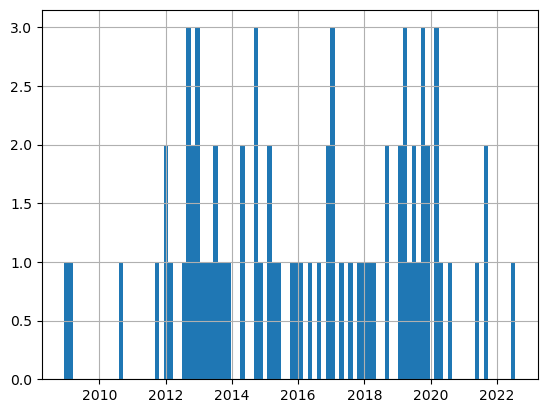

In [26]:
performance['first_upload_date'] = pd.to_datetime(performance['first_upload'])
performance.first_upload_date.hist(bins=100)

<Axes: >

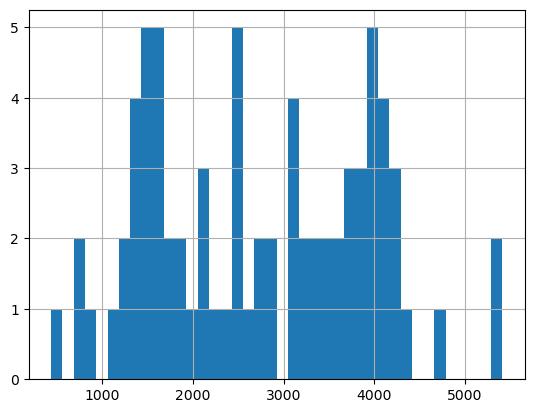

In [27]:
# calculating the number of days between first upload and october 1st, 2023
performance['days_since_first_upload'] = (pd.to_datetime('2023-10-01') - performance['first_upload_date']).dt.days
# histogram of days since first upload
performance.days_since_first_upload.hist(bins=40)

### Moderators

In [28]:
# views: high_view, low_view
performance['high_view'] = performance['views'] > performance['views'].median()
# views_per_upload: high_view_per_upload, low_view_per_upload
performance['high_view_per_upload'] = performance['views_per_upload'] > performance['views_per_upload'].median()
# engagements: high_engagement, low_engagement
performance['high_engagement'] = performance['engagements'] > performance['engagements'].median()
# engagements_per_upload: high_engagement_per_upload, low_engagement_per_upload
performance['high_engagement_per_upload'] = performance['engagements_per_upload'] > performance['engagements_per_upload'].median()
# uploads: high_uploads, low_uploads
performance['high_num_videos'] = performance['uploads'] > performance['uploads'].median()
# followers: high_followers, low_followers
performance['high_followers'] = performance['followers'] > performance['followers'].median()
# followers_growth: high_followers_growth, low_followers_growth
performance['high_followers_growth'] = performance['followers_growth'] > performance['followers_growth'].median()
# influencer_score: high_influencer_score, low_influencer_score
performance['high_influencer_score'] = performance['influencer_score'] > performance['influencer_score'].median()
# days_since_first_upload: high_days_since_first_upload, low_days_since_first_upload
performance['high_tenure'] = performance['days_since_first_upload'] > performance['days_since_first_upload'].median()

# preview of the data
performance.head()

,creator_id,views,views_per_upload,engagements,engagements_per_upload,uploads_90,uploads,followers,followers_30,followers_growth,...,days_since_first_upload,high_view,high_view_per_upload,high_engagement,high_engagement_per_upload,high_num_videos,high_followers,high_followers_growth,high_influencer_score,high_tenure
0,nGdL7FhhGC,1381594342,1.892595e+06,18871172,25850.920548,9,730,12200000,100000,0.008197,...,4043,True,True,True,True,True,True,False,True,True
1,292js2E5nD03YGFoX01,137997485,2.851188e+05,2940642,6075.706612,62,484,249000,9000,0.036145,...,1411,True,True,True,True,True,True,True,True,False
2,2zNDCwKoz03Z65e601,28311950,3.011910e+05,1052895,11201.010638,39,94,261000,89000,0.340996,...,435,True,True,True,True,False,True,True,True,False
3,3r2vvJJmur03WAUnq01,25683510,1.756738e+04,861873,589.516416,57,1462,167000,47000,0.281437,...,768,True,False,True,False,True,True,True,True,False
4,AN2sJuJhwS03Y4JM201,53487927,7.470381e+04,1009452,1409.849162,46,716,243000,22000,0.090535,...,1468,True,True,True,True,True,True,True,True,False


In [32]:
# merging performance and trend data
cols = ['creator_id', 'total_views', 'views_per_upload', 'total_engagements',
       'engagements_per_upload', 'uploads_90', 'total_uploads', 'total_followers',
       'followers_30', 'followers_growth', 'first_upload', 'influencer_score',
       'first_upload_date', 'days_since_first_upload', 'high_view',
       'high_view_per_upload', 'high_engagement', 'high_engagement_per_upload',
       'high_num_videos', 'high_followers', 'high_followers_growth',
       'high_influencer_score', 'high_tenure']
performance.columns = cols
trend.merge(performance, on='creator_id', how='left').to_csv(os.path.join(PATH, 'channel_trends_to_stata_performance.csv'), index=False)